## Fine-Tuning Transformer Models for Cross-Domain Text Classification and Analysis

### Objective:
1. Explore how transformers (e.g., BERT, GPT, T5) can be fine-tuned for domain-specific
classification tasks.
2. Understand how attention mechanisms can help a model focus on important tokens and
improve performance in various domains (e.g., medical, legal, or financial texts).
3. Experiment with transfer learning and domain adaptation techniques.
4. Learn how to evaluate models on unseen data and adjust hyperparameters for better results.

In [ ]:
# install Hugging Face datasets
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda

In [ ]:
!pip install wandb -q
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bessyt (bessyt-cstu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score # for model evaluation
from transformers import BertTokenizer

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer
from transformers import TrainingArguments
from transformers import DistilBertConfig
from datasets import load_dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
!pip install bertviz -q
from bertviz import head_view, model_view
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 876.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    eval_strategy="epoch",
    num_train_epochs=3
)
print("TrainingArguments initialized successfully")

TrainingArguments initialized successfully


In [ ]:
# set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
def compute_metrics(eval_pred):
  # function to compute accuracy during evaluation
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return {'accuracy': accuracy_score(labels, predictions)}

### Preprocessing and Loading Data

In [ ]:
def load_and_preprocess_data():
  # loading 'mrpc' dataset from 'glue' benchmark
  print("Loading MRPC dataset...")
  dataset = load_dataset("glue", "mrpc")

  # use 'distilbert' to replace 'bert' to use fewer resources and optimize speed
  tokenizer = BertTokenizer.from_pretrained("distilbert-base-uncased")

  def tokenize_function(eg):
    return tokenizer(
      eg['sentence1'],
      eg['sentence2'],
      padding='max_length',
      truncation=True,
      max_length=128,
      return_token_type_ids=False # DistilBERT doesn't use token_type_ids
  )

  # apply tokenization, rename "label" column to "labels" to match BERT model
  tokenized_datasets = dataset.map(tokenize_function, batched=True)
  tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

  # use smaller subsets for faster debugging
  tokenized_datasets["train"] = tokenized_datasets["train"].select(range(500))
  tokenized_datasets["validation"] = tokenized_datasets["validation"].select(range(10))
  tokenized_datasets["test"] = tokenized_datasets["test"].select(range(100))

  return tokenized_datasets, tokenizer

### Training

In [ ]:
# Model training
def train_model(tokenized_datasets):
  config = DistilBertConfig.from_pretrained(
      "distilbert-base-uncased",
      num_labels=2,
      output_attention=True
  )


  # fine-tune the BERT model on the MRPC dataset. returns trained model and trainer object.
  # 'uncased' for lowercase text, 'num_labels=2' for 2 classes
  model = DistilBertForSequenceClassification.from_pretrained(
      "distilbert-base-uncased",
      config=config)

  # training arguments
  training_args = TrainingArguments(
      output_dir='./results',
      eval_strategy="epoch",
      per_device_train_batch_size=16,
      per_device_eval_batch_size=32,
      num_train_epochs=3,
      learning_rate=2e-5,
      weight_decay=0.01,
      fp16=True,
      logging_steps=10,
      save_strategy="epoch",
      load_best_model_at_end=True,
      metric_for_best_model="accuracy",
      report_to="wandb")

  # create trainer instance
  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=tokenized_datasets["train"],
      eval_dataset=tokenized_datasets["validation"],
      compute_metrics=compute_metrics
  )

  # train the model
  print("Start training...")
  trainer.train()

  return trainer, model

In [ ]:
def evaluate_model(trainer, tokenized_datasets):
  print("Evaluating model on test set...")
  predictions = trainer.predict(tokenized_datasets["test"])
  preds = predictions.predictions.argmax(axis=-1)
  labels = predictions.label_ids

  # classification report
  print("\nClassification Report:")
  print(classification_report(labels, preds, target_names=["Not Paraphrase", "Paraphrase"]))

  # confusion matrix
  cm = confusion_matrix(labels, preds)
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=["Not Paraphrase", "Paraphrase"],
              yticklabels=["Not Paraphrase", "Paraphrase"])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  # calculate accuracy
  accuracy = accuracy_score(labels, preds)
  print(f"\nTest Accuracy: {accuracy:.4f}")

  return predictions

### Attention Visualization

In [ ]:
def visualize_attention(model, tokenizer, sentence1, sentence2):
  # visualize attention weights for a given sentence pair
  inputs = tokenizer(
      sentence1,
      sentence2,
      return_tensors="pt",
      padding=True,
      truncation=True,
      return_token_type_ids=False) # for DistilBERT

  # get attention weights
  model.eval()
  with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

  # convert token IDs to tokesn
  tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

  # visualize attention
  print(f"\nAttention visualization for: '{sentence1}' and '{sentence2}'")
  print("\nHead View:")
  display(head_view(
      outputs.attentions,
      tokens))

  print("\nModel View:")
  display(model_view(
      outputs.attentions,
      tokens,
      include_layers=[0, 3, 5]))

Loading MRPC dataset...


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Start training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.667600,0.691312,0.600000
2,0.518800,0.691279,0.600000


Epoch,Training Loss,Validation Loss,Accuracy
1,0.667600,0.691312,0.600000
2,0.518800,0.691279,0.600000
3,0.507900,0.687699,0.600000


Evaluating model on test set...



Classification Report:
                precision    recall  f1-score   support

Not Paraphrase       0.80      0.12      0.22        32
    Paraphrase       0.71      0.99      0.82        68

      accuracy                           0.71       100
     macro avg       0.75      0.56      0.52       100
  weighted avg       0.74      0.71      0.63       100



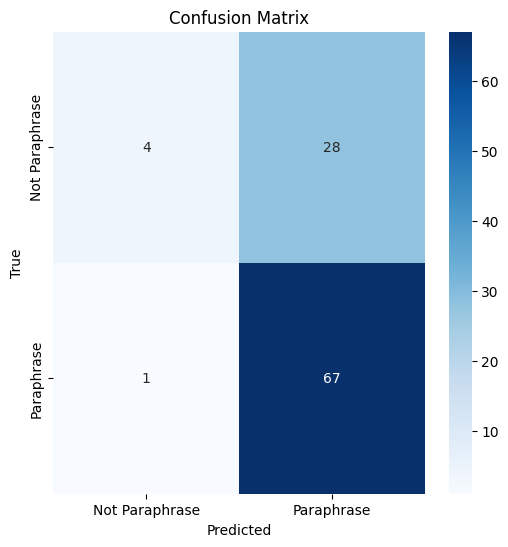


Test Accuracy: 0.7100

Generating attention visualizations...

Attention visualization for: 'The cat sits on the mat' and 'The feline is resting on the rug'

Head View:


<IPython.core.display.Javascript object>

None


Model View:


<IPython.core.display.Javascript object>

None

eval/accuracy,███▁▁▁
eval/loss,▃▃▁██▇
eval/runtime,▁▄▁▃▂█
eval/samples_per_second,█▄█▅▆▁
eval/steps_per_second,█▄█▅▆▁
test/accuracy,█▁
test/loss,█▁
test/runtime,▁█
test/samples_per_second,█▁
test/steps_per_second,█▁
train/epoch,▁▂▃▃▃▄▅▅▆▇███▁▂▃▃▃▄▅▅▆▇███


In [ ]:
def main():
  # load and preprocess data
  tokenized_datasets, tokenizer = load_and_preprocess_data()

  # train model
  trainer, model = train_model(tokenized_datasets)

  # evaluate model
  predictions = evaluate_model(trainer, tokenized_datasets)

  # attention visualization
  print("\nGenerating attention visualizations...")
  visualize_attention(
      model,
      tokenizer,
      "The cat sits on the mat",
      "The feline is resting on the rug"
  )

  wandb.finish()

if __name__ == "__main__":
  main()
